**IMPORTING LIBRARIES**

In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix  
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

**Loading Train and Test dataset**

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
data_set=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Heart_Disease_Prediction.csv')


Mounted at /content/drive


**Exploratory Data Analysis(EDA)**

In [3]:
data_set.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
data_set.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [5]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [6]:
data_set.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [7]:
data_set.columns


Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

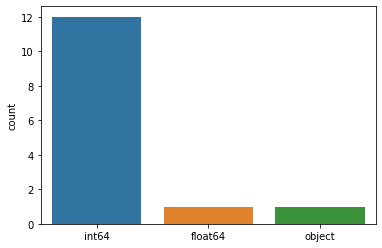

In [8]:
sns.countplot(data_set.dtypes.map(str))
plt.show()

In [9]:
data_set.dtypes.value_counts()

int64      12
float64     1
object      1
dtype: int64

In [10]:
data_set.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

**Data visualizations**

Data visualisations using distplot,boxplot(because distplot and boxplot shows how data is distributed and if there are any outliers

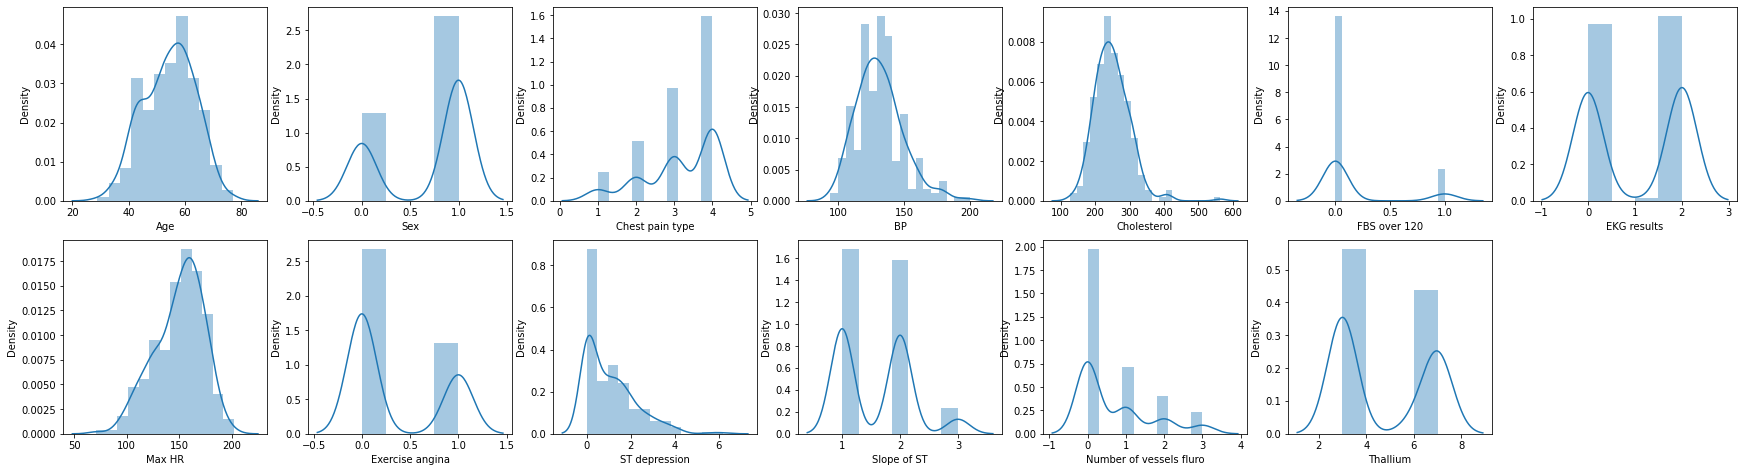

In [11]:
count=1
plt.subplots(figsize=(30,25))
for i in data_set.columns:
    if data_set[i].dtypes!='object':
        plt.subplot(6,7,count)
        sns.distplot(data_set[i])
        count+=1

plt.show()

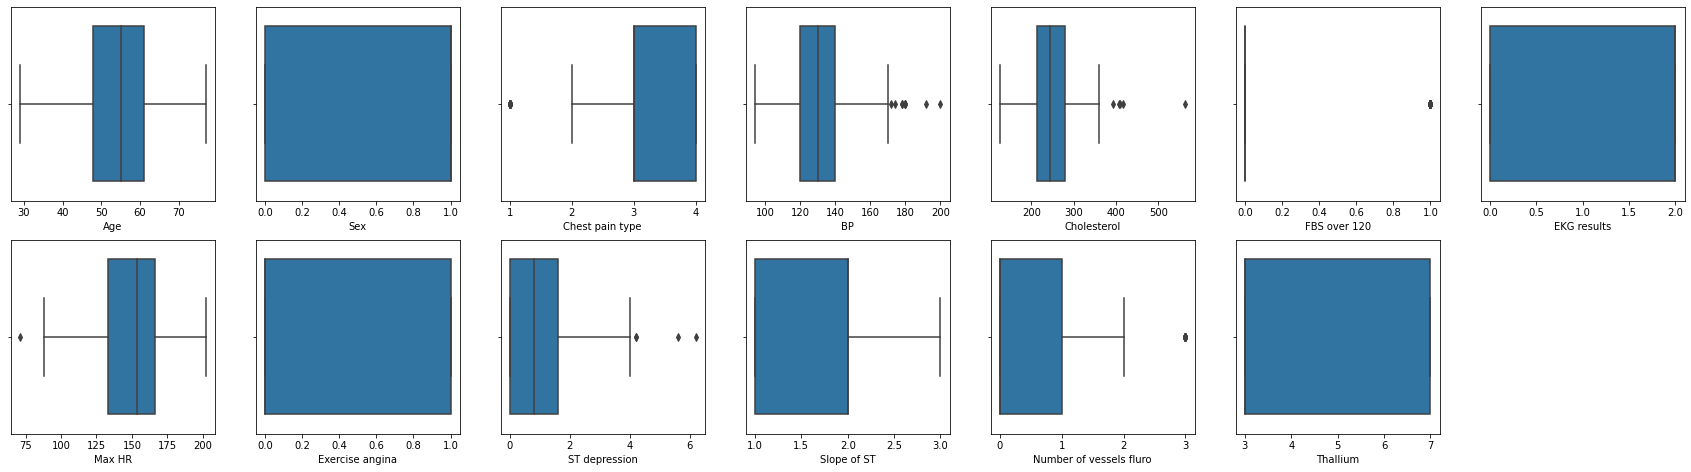

In [12]:
count=1
plt.subplots(figsize=(30,25))
for i in data_set.columns:
    if data_set[i].dtypes!='object':
        plt.subplot(6,7,count)
        sns.boxplot(data_set[i])
        count+=1

plt.show()

In [13]:
le=LabelEncoder()
data_set.iloc[:,-1]=le.fit_transform(data_set.iloc[:,-1])

**Train test and split**

In [14]:
X = data_set.iloc[:,:-1]
y = data_set.iloc[:,-1]

**XGBOOST ALGORITHM**

In [36]:
# XGBoost :
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
lc = LabelEncoder() 
lc = lc.fit(y) 
lc_y = lc.transform(y)

model = XGBClassifier() 
model.fit(X_train, y_train)

y_pred = model.predict(X_test) 
predictions = [round(value) for value in y_pred]

cm= confusion_matrix(y_test, y_pred)  
print(cm)

accuracy1 = accuracy_score(y_test, predictions) 
print("Accuracy1: %.2f%%" % (accuracy1 * 100.0))

[[63 15]
 [ 9 48]]
Accuracy1: 82.22%


**LOGISTIC REGRESSION**

In [17]:
# Logistic Regression:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#logreg = LogisticRegression()
#logreg.fit(X_train,y_train)
#y_pred = logreg.predict(X_train)
#print('Train accuracy score:',(accuracy_score(y_train,y_pred)*100,2),"%")
#print('Test accuracy score:', (accuracy_score(y_test,logreg.predict(X_test))*100,2),"%")
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)
score_lr = round(accuracy_score(y_pred_lr,y_test)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 82.96 %


              precision    recall  f1-score   support

           0       0.88      0.81      0.84        78
           1       0.76      0.84      0.80        57

    accuracy                           0.82       135
   macro avg       0.82      0.82      0.82       135
weighted avg       0.83      0.82      0.82       135



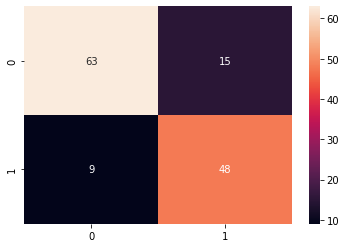

In [18]:
print(classification_report(y_test, y_pred))


matrix= confusion_matrix(y_test, y_pred)
sns.heatmap(matrix,annot = True, fmt = "d")

In [19]:
X_train

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
160,38,1,1,120,231,0,0,182,1,3.8,2,0,7
58,59,0,4,174,249,0,0,143,1,0.0,2,0,3
41,62,0,4,124,209,0,0,163,0,0.0,1,0,3
14,57,0,4,128,303,0,2,159,0,0.0,1,1,3
50,42,1,4,136,315,0,0,125,1,1.8,2,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,44,1,2,130,219,0,2,188,0,0.0,1,0,3
192,54,1,2,108,309,0,0,156,0,0.0,1,0,7
117,56,0,4,200,288,1,2,133,1,4.0,3,2,7
47,44,1,4,110,197,0,2,177,0,0.0,1,1,3


In [20]:
y_train

160    1
58     1
41     0
14     0
50     1
      ..
251    0
192    0
117    1
47     1
172    1
Name: Heart Disease, Length: 135, dtype: int64

In [21]:
X_test

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
64,63,1,1,145,233,1,2,150,0,2.3,3,0,6
135,46,0,3,142,177,0,2,160,1,1.4,3,0,3
153,64,0,4,130,303,0,0,122,0,2.0,2,2,3
189,70,1,3,160,269,0,0,112,1,2.9,2,1,7
253,51,1,3,110,175,0,0,123,0,0.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,58,0,1,150,283,1,2,162,0,1.0,1,0,3
104,63,1,4,130,254,0,2,147,0,1.4,2,1,7
173,68,0,3,120,211,0,2,115,0,1.5,2,0,3
86,62,1,2,128,208,1,2,140,0,0.0,1,0,3


In [22]:
y_test

64     0
135    0
153    0
189    1
253    0
      ..
228    0
104    1
173    0
86     0
10     0
Name: Heart Disease, Length: 135, dtype: int64

**RANDOM FOREST**

In [23]:
randfor = RandomForestClassifier(n_estimators=100, random_state=0)

randfor.fit(X_train, y_train)

y_pred_rf = randfor.predict(X_test)

score_rf = round(accuracy_score(y_pred_rf,y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 80.74 %


              precision    recall  f1-score   support

           0       0.84      0.82      0.83        78
           1       0.76      0.79      0.78        57

    accuracy                           0.81       135
   macro avg       0.80      0.80      0.80       135
weighted avg       0.81      0.81      0.81       135



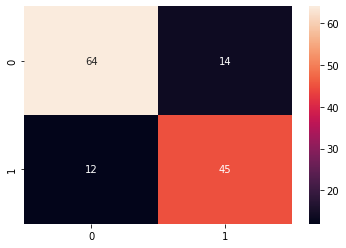

In [24]:
print(classification_report(y_test, y_pred_rf))

matrix= confusion_matrix(y_test, y_pred_rf)
sns.heatmap(matrix,annot = True, fmt = "d")

 **Decision Tree**

In [25]:
dt = DecisionTreeClassifier(max_depth=3, random_state=0)

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

score_dt = round(accuracy_score(y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 75.56 %


              precision    recall  f1-score   support

           0       0.86      0.85      0.85        78
           1       0.79      0.81      0.80        57

    accuracy                           0.83       135
   macro avg       0.83      0.83      0.83       135
weighted avg       0.83      0.83      0.83       135



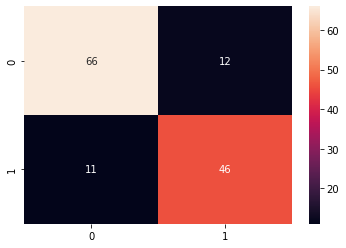

In [26]:
print(classification_report(y_test, y_pred_lr))


matrix= confusion_matrix(y_test, y_pred_lr)
sns.heatmap(matrix,annot = True, fmt = "d")

**Random Forest**

In [27]:
randfor = RandomForestClassifier(n_estimators=100, random_state=0)

randfor.fit(X_train, y_train)

y_pred_rf = randfor.predict(X_test)

score_rf = round(accuracy_score(y_pred_rf,y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 80.74 %


              precision    recall  f1-score   support

           0       0.84      0.82      0.83        78
           1       0.76      0.79      0.78        57

    accuracy                           0.81       135
   macro avg       0.80      0.80      0.80       135
weighted avg       0.81      0.81      0.81       135



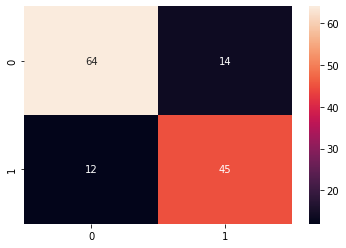

In [28]:
print(classification_report(y_test, y_pred_rf))

matrix= confusion_matrix(y_test, y_pred_rf)
sns.heatmap(matrix,annot = True, fmt = "d")

**Naive Bayes**

In [29]:
gnb = GaussianNB()
y_pred_nb = gnb.fit(X_train, y_train).predict(X_test)

score_nb = round(accuracy_score(y_pred_nb,y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 79.26 %


              precision    recall  f1-score   support

           0       0.85      0.78      0.81        78
           1       0.73      0.81      0.77        57

    accuracy                           0.79       135
   macro avg       0.79      0.79      0.79       135
weighted avg       0.80      0.79      0.79       135



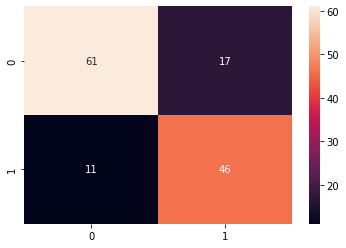

In [30]:
print(classification_report(y_test, y_pred_nb))

matrix= confusion_matrix(y_test, y_pred_nb)
sns.heatmap(matrix,annot = True, fmt = "d")

**Support Vector Machine**

In [31]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred_svm = dt.predict(X_test)

score_svm = round(accuracy_score(y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using SVM is: "+str(score_svm)+" %")


The accuracy score achieved using SVM is: 75.56 %


              precision    recall  f1-score   support

           0       0.80      0.77      0.78        78
           1       0.70      0.74      0.72        57

    accuracy                           0.76       135
   macro avg       0.75      0.75      0.75       135
weighted avg       0.76      0.76      0.76       135



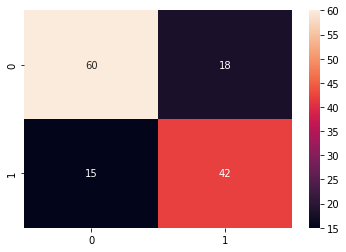

In [32]:
print(classification_report(y_test, y_pred_svm))

matrix= confusion_matrix(y_test, y_pred_svm)
sns.heatmap(matrix,annot = True, fmt = "d")

In [33]:
accuracy = []

classifiers = ['Decision Trees', 'Logistic Regression', 'Naive Bayes', 'Random Forests','Support Vector Machine','XGBOOST ALGORITHM']

models = [DecisionTreeClassifier(max_depth=3, random_state=0), LogisticRegression(), 
        GaussianNB(), RandomForestClassifier(n_estimators=100, random_state=0), SVC(kernel = 'rbf', random_state = 0),XGBClassifier() ]

for i in models:
    model = i
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    accuracy.append(score)

In [34]:
summary = pd.DataFrame({'Accuracy':accuracy}, index=classifiers)       
summary

,Accuracy
Decision Trees,0.755556
Logistic Regression,0.829630
Naive Bayes,0.792593
Random Forests,0.807407
Support Vector Machine,0.711111
XGBOOST ALGORITHM,0.822222


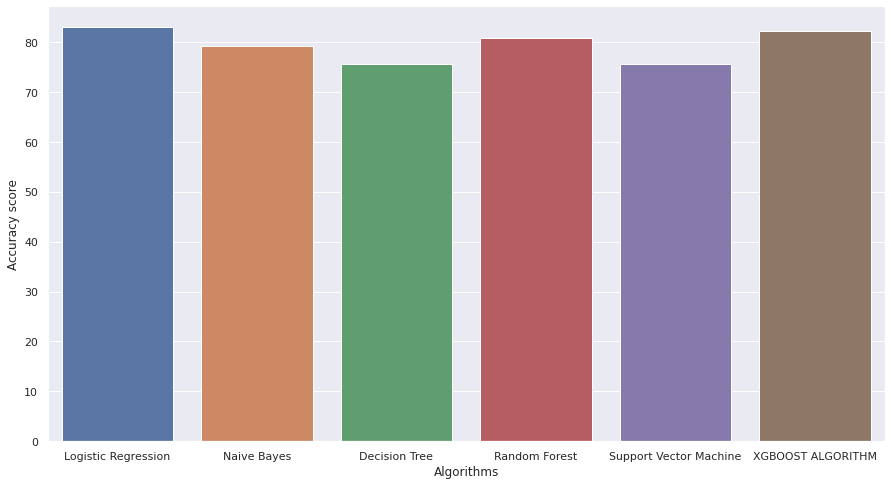

In [37]:
scores = [score_lr,score_nb,score_dt,score_rf,score_svm,accuracy1*100]
algorithms = ["Logistic Regression","Naive Bayes","Decision Tree","Random Forest","Support Vector Machine",'XGBOOST ALGORITHM'] 
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)